# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

In [4]:
df.dtypes

accountAge                                        int64
digitalItemCount                                  int64
sumPurchaseCount1Day                              int64
sumPurchaseAmount1Day                           float64
sumPurchaseAmount30Day                          float64
paymentBillingPostalCode - LogOddsForClass_0    float64
accountPostalCode - LogOddsForClass_0           float64
paymentBillingState - LogOddsForClass_0         float64
accountState - LogOddsForClass_0                float64
paymentInstrumentAgeInAccount                   float64
ipState - LogOddsForClass_0                     float64
transactionAmount                               float64
transactionAmountUSD                            float64
ipPostalCode - LogOddsForClass_0                float64
localHour - LogOddsForClass_0                   float64
Label                                             int64
dtype: object

In [5]:
df.isnull().sum()

accountAge                                      0
digitalItemCount                                0
sumPurchaseCount1Day                            0
sumPurchaseAmount1Day                           0
sumPurchaseAmount30Day                          0
paymentBillingPostalCode - LogOddsForClass_0    0
accountPostalCode - LogOddsForClass_0           0
paymentBillingState - LogOddsForClass_0         0
accountState - LogOddsForClass_0                0
paymentInstrumentAgeInAccount                   0
ipState - LogOddsForClass_0                     0
transactionAmount                               0
transactionAmountUSD                            0
ipPostalCode - LogOddsForClass_0                0
localHour - LogOddsForClass_0                   0
Label                                           0
dtype: int64

In [6]:
print(df.columns)

Index(['accountAge', 'digitalItemCount', 'sumPurchaseCount1Day',
       'sumPurchaseAmount1Day', 'sumPurchaseAmount30Day',
       'paymentBillingPostalCode - LogOddsForClass_0',
       'accountPostalCode - LogOddsForClass_0',
       'paymentBillingState - LogOddsForClass_0',
       'accountState - LogOddsForClass_0', 'paymentInstrumentAgeInAccount',
       'ipState - LogOddsForClass_0', 'transactionAmount',
       'transactionAmountUSD', 'ipPostalCode - LogOddsForClass_0',
       'localHour - LogOddsForClass_0', 'Label'],
      dtype='object')


In [7]:
df.describe()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
count,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,138721.000000,1.387210e+05,138721.000000,138721.000000,138721.000000,138721.000000
mean,408.456679,0.865017,1.224018,92.411768,57.280717,3.852491,3.468364,4.427882,4.287014,72.623256,3.806588,2.389925e+03,236.033152,2.816048,4.768151,0.005745
std,711.300625,0.604681,11.235396,1105.622216,806.837009,2.023177,2.127371,0.994649,0.992454,271.189458,1.039490,4.998821e+04,998.162648,1.497330,0.363702,0.075580
min,1.000000,0.000000,0.000000,0.000000,0.000000,-0.154151,-0.154151,0.265703,0.342945,0.000000,0.265703,1.000000e-02,0.000000,0.182322,0.421214,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.887303,0.716678,3.817305,3.811097,0.000000,3.356462,8.479000e+01,85.190000,1.408767,4.745402,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,4.422139,4.497450,0.000000,4.114614,1.399900e+02,139.990000,2.929287,4.886641,0.000000
75%,497.000000,1.000000,0.000000,0.000000,0.000000,5.064533,5.096396,5.563677,4.992339,0.029861,4.453620,2.395100e+02,199.754240,3.865009,4.962055,0.000000
max,2000.000000,29.000000,505.000000,258877.420000,258877.420000,5.412885,5.096396,5.563677,5.561934,4019.593056,4.874212,8.999998e+06,132568.670000,5.008490,5.040929,1.000000


In [8]:
df['Label'].mean()

0.0057453449730033666

In [9]:
df[df['Label'] == 1].shape

(797, 16)

In [10]:
df[df['Label'] == 1].mean()

accountAge                                       101.830615
digitalItemCount                                   1.010038
sumPurchaseCount1Day                               0.867001
sumPurchaseAmount1Day                            156.622108
sumPurchaseAmount30Day                           112.142999
paymentBillingPostalCode - LogOddsForClass_0       3.679139
accountPostalCode - LogOddsForClass_0              3.458423
paymentBillingState - LogOddsForClass_0            4.109346
accountState - LogOddsForClass_0                   4.003393
paymentInstrumentAgeInAccount                     21.960415
ipState - LogOddsForClass_0                        3.798498
transactionAmount                               6470.361230
transactionAmountUSD                             359.932994
ipPostalCode - LogOddsForClass_0                   2.717858
localHour - LogOddsForClass_0                      4.588067
Label                                              1.000000
dtype: float64

In [11]:
df[df['Label'] == 0].mean()

accountAge                                       410.228532
digitalItemCount                                   0.864179
sumPurchaseCount1Day                               1.226081
sumPurchaseAmount1Day                             92.040726
sumPurchaseAmount30Day                            56.963693
paymentBillingPostalCode - LogOddsForClass_0       3.853492
accountPostalCode - LogOddsForClass_0              3.468421
paymentBillingState - LogOddsForClass_0            4.429723
accountState - LogOddsForClass_0                   4.288653
paymentInstrumentAgeInAccount                     72.916013
ipState - LogOddsForClass_0                        3.806635
transactionAmount                               2366.345946
transactionAmountUSD                             235.317191
ipPostalCode - LogOddsForClass_0                   2.816616
localHour - LogOddsForClass_0                      4.769192
Label                                              0.000000
dtype: float64

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
np.corrcoef(df['digitalItemCount'], df['sumPurchaseCount1Day'])


array([[1.        , 0.02260806],
       [0.02260806, 1.        ]])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


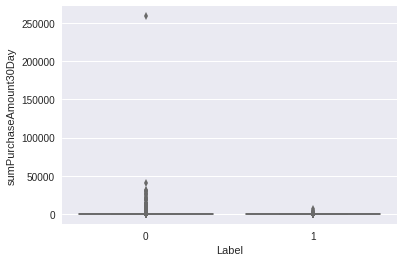

In [14]:
import seaborn as sns
ax = sns.boxplot(y=df['sumPurchaseAmount30Day'],x=df['Label'], palette="Set3")

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


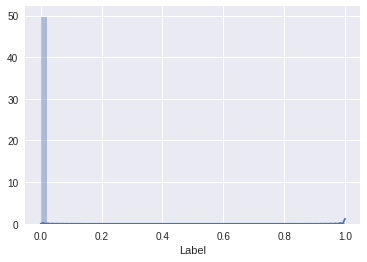

In [15]:
sns.distplot(df['Label']);

In [0]:
X_ = df[['accountAge', 'digitalItemCount', 'sumPurchaseCount1Day',
       'sumPurchaseAmount1Day', 'sumPurchaseAmount30Day',
       'paymentBillingPostalCode - LogOddsForClass_0',
       'accountPostalCode - LogOddsForClass_0',
       'paymentBillingState - LogOddsForClass_0',
       'accountState - LogOddsForClass_0', 'paymentInstrumentAgeInAccount',
       'ipState - LogOddsForClass_0', 'transactionAmount',
       'transactionAmountUSD', 'ipPostalCode - LogOddsForClass_0',
       'localHour - LogOddsForClass_0']]
Y = df.Label

In [17]:
X_.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771


In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_)
X = pd.DataFrame(x_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.000000,0.00000,0.000000,0.002782,0.937426,0.109582,0.197525,0.042815,8.158971e-01,0.206673,0.000067,0.004723,0.223204,0.936029
1,0.030515,0.034483,0.00198,0.004579,0.009774,0.124509,0.121128,0.780613,0.796555,1.541702e-02,0.818030,0.000132,0.008942,0.787125,0.974115
2,1.000000,0.000000,0.00000,0.000000,0.000000,0.937426,1.000000,0.526740,0.538856,0.000000e+00,0.661490,0.000004,0.000242,1.000000,0.935358
3,0.000000,0.034483,0.00000,0.000000,0.000000,0.937426,1.000000,0.578608,0.572581,0.000000e+00,0.708189,0.000015,0.001001,0.236752,0.936029
4,0.000000,0.034483,0.00000,0.000000,0.000513,1.000000,0.094675,1.000000,0.717384,3.455297e-07,0.708189,0.000060,0.004101,0.520315,0.964466


In [0]:
X.columns = ['accountAge', 'digitalItemCount', 'sumPurchaseCount1Day',
       'sumPurchaseAmount1Day', 'sumPurchaseAmount30Day',
       'paymentBillingPostalCode - LogOddsForClass_0',
       'accountPostalCode - LogOddsForClass_0',
       'paymentBillingState - LogOddsForClass_0',
       'accountState - LogOddsForClass_0', 'paymentInstrumentAgeInAccount',
       'ipState - LogOddsForClass_0', 'transactionAmount',
       'transactionAmountUSD', 'ipPostalCode - LogOddsForClass_0',
       'localHour - LogOddsForClass_0']

In [21]:
X.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0
0,1.000000,0.000000,0.00000,0.000000,0.002782,0.937426,0.109582,0.197525,0.042815,8.158971e-01,0.206673,0.000067,0.004723,0.223204,0.936029
1,0.030515,0.034483,0.00198,0.004579,0.009774,0.124509,0.121128,0.780613,0.796555,1.541702e-02,0.818030,0.000132,0.008942,0.787125,0.974115
2,1.000000,0.000000,0.00000,0.000000,0.000000,0.937426,1.000000,0.526740,0.538856,0.000000e+00,0.661490,0.000004,0.000242,1.000000,0.935358
3,0.000000,0.034483,0.00000,0.000000,0.000000,0.937426,1.000000,0.578608,0.572581,0.000000e+00,0.708189,0.000015,0.001001,0.236752,0.936029
4,0.000000,0.034483,0.00000,0.000000,0.000513,1.000000,0.094675,1.000000,0.717384,3.455297e-07,0.708189,0.000060,0.004101,0.520315,0.964466


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state = 42)

In [23]:
X_train.shape

(97104, 15)

# Exercise 15.1

Estimate a Logistic Regression, a Decision Tree and RF

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

In [0]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, Y_train)
Pred_Log= clf.predict(X_test)

In [0]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train, Y_train)
Pred_Tree = clf1.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train, Y_train)
Pred_Rf = clf2.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

## accuracy

In [28]:
print("Logistica",accuracy_score(Y_test, Pred_Log))
print("arbol    ",accuracy_score(Y_test, Pred_Tree))
print("RF       ",accuracy_score(Y_test, Pred_Rf))

Logistica 0.994112982675349
arbol     0.9888987673306582
RF        0.9942331258860562


## F1-Score

In [29]:
print("Logistica",f1_score(Y_test, Pred_Log))
print("arbol    ",f1_score(Y_test, Pred_Tree))
print("RF       ",f1_score(Y_test, Pred_Rf))

Logistica 0.0
arbol     0.14444444444444443
RF        0.14893617021276595


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## F_Beta-Score

In [30]:
print("Logistica",fbeta_score(Y_test, Pred_Log, beta=10))
print("arbol    ",fbeta_score(Y_test, Pred_Tree,beta=10))
print("RF       ",fbeta_score(Y_test, Pred_Rf,beta=10))

Logistica 0.0
arbol     0.15886267392619477
RF        0.08644088519378897


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
resultado = pd.DataFrame(columns=('METODO', 'MODELO', 'ACCURACY', 'F1-SCORE','F_BETA-SCORE'))

In [32]:
resultado.loc[len(resultado)]=['NA','LOG',accuracy_score(Y_test, Pred_Log),f1_score(Y_test, Pred_Log),fbeta_score(Y_test, Pred_Log, beta=10)] 
resultado.loc[len(resultado)]=['NA','DTR',accuracy_score(Y_test, Pred_Tree),f1_score(Y_test, Pred_Tree),fbeta_score(Y_test, Pred_Tree, beta=10)] 
resultado.loc[len(resultado)]=['NA','RF',accuracy_score(Y_test, Pred_Rf),f1_score(Y_test, Pred_Rf),fbeta_score(Y_test, Pred_Rf, beta=10)] 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
resultado

,METODO,MODELO,ACCURACY,F1-SCORE,F_BETA-SCORE
0,NA,LOG,0.994113,0.000000,0.000000
1,NA,DTR,0.988899,0.144444,0.158863
2,NA,RF,0.994233,0.148936,0.086441


resultado

# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [0]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

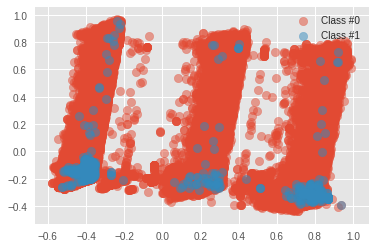

In [35]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

# Plot the original data

def plot_two_classes(X, Y, subplot=False):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1)
        
    subplot.scatter(X[Y==0, 0], X[Y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[Y==1, 0], X[Y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, Y_train)

In [36]:
n_samples = Y_train.shape[0]
print(n_samples)

97104


In [37]:
n_samples_0 = (Y_train == 0).sum()
n_samples_0

96552

In [38]:
n_samples_1 = (Y_train == 1).sum()
n_samples_1

552

In [39]:
n_samples_1 / n_samples

0.005684626791893228

In [40]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

552.0

In [41]:


n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.00571712652249565

In [0]:
# Select all negatives
filter_ = Y_train == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [43]:
filter_.sum()

520

In [0]:
filter_ = filter_ | (Y_train == 1)

In [0]:
filter_ = filter_.astype(bool)

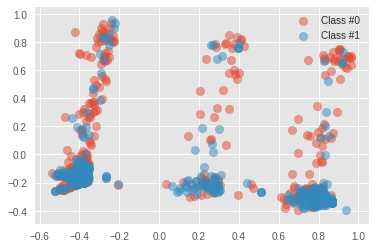

In [46]:
plot_two_classes(x_vis[filter_], Y_train[filter_])

In [47]:
clf = LogisticRegression(random_state=42, solver='lbfgs',
                         multi_class='multinomial').fit(X_train[filter_], Y_train[filter_])
Pred_Log_05= clf.predict(X_test)

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_train[filter_], Y_train[filter_])
Pred_Tree_05 = clf1.predict(X_test)

clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_train[filter_], Y_train[filter_])
Pred_Rf_05 = clf2.predict(X_test)
print("accuracy")
print("Logistica",accuracy_score(Y_test, Pred_Log_05))
print("arbol    ",accuracy_score(Y_test, Pred_Tree_05))
print("RF       ",accuracy_score(Y_test, Pred_Rf_05))
print("f1_score")
print("Logistica",f1_score(Y_test, Pred_Log_05))
print("arbol    ",f1_score(Y_test, Pred_Tree_05))
print("RF       ",f1_score(Y_test, Pred_Rf_05))
print("f1_score")
print("Logistica",fbeta_score(Y_test, Pred_Log_05, beta=10))
print("arbol    ",fbeta_score(Y_test, Pred_Tree_05,beta=10))
print("RF       ",fbeta_score(Y_test, Pred_Rf_05,beta=10))

accuracy
Logistica 0.5357666338275224
arbol     0.6200591104596679
RF        0.7730975322584521
f1_score
Logistica 0.018691588785046728
arbol     0.021534653465346536
RF        0.034754165388939995
f1_score
Logistica 0.4229114989873245
arbol     0.43483855004330074
RF        0.5044362183442035


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
resultado.loc[len(resultado)]=['random-under-sampling target_percentage=0.5','LOG',accuracy_score(Y_test, Pred_Log_05),f1_score(Y_test, Pred_Log_05),fbeta_score(Y_test, Pred_Log_05, beta=10)] 
resultado.loc[len(resultado)]=['random-under-sampling target_percentage=0.5','DTR',accuracy_score(Y_test, Pred_Tree_05),f1_score(Y_test, Pred_Tree_05),fbeta_score(Y_test, Pred_Tree_05, beta=10)] 
resultado.loc[len(resultado)]=['random-under-sampling target_percentage=0.5','RF',accuracy_score(Y_test, Pred_Rf_05),f1_score(Y_test, Pred_Rf_05),fbeta_score(Y_test, Pred_Rf_05, beta=10)] 

In [0]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [50]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, Y_train, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    clf = LogisticRegression(random_state=42, solver='lbfgs',
                         multi_class='multinomial').fit(X_u, y_u)
    Pred_Log_05= clf.predict(X_test)
    clf1 = tree.DecisionTreeClassifier()
    clf1 = clf1.fit(X_u, y_u)
    Pred_Tree_05 = clf1.predict(X_test)
    clf2 = RandomForestClassifier(random_state=42)
    clf2.fit(X_u, y_u)
    Pred_Rf_05 = clf2.predict(X_test)
    print("accuracy")
    print("Logistica",accuracy_score(Y_test, Pred_Log_05))
    print("arbol    ",accuracy_score(Y_test, Pred_Tree_05))
    print("RF       ",accuracy_score(Y_test, Pred_Rf_05))
    print("f1_score")
    print("Logistica",f1_score(Y_test, Pred_Log_05))
    print("arbol    ",f1_score(Y_test, Pred_Tree_05))
    print("RF       ",f1_score(Y_test, Pred_Rf_05))
    print("fbeta_score")
    print("Logistica",fbeta_score(Y_test, Pred_Log_05, beta=10))
    print("arbol    ",fbeta_score(Y_test, Pred_Tree_05,beta=10))
    print("RF       ",fbeta_score(Y_test, Pred_Rf_05,beta=10))
    resultado.loc[len(resultado)]=['random-under-sampling target_percentage='+str(target_percentage),'LOG',accuracy_score(Y_test, Pred_Log_05),f1_score(Y_test, Pred_Log_05),fbeta_score(Y_test, Pred_Log_05, beta=10)]
    resultado.loc[len(resultado)]=['random-under-sampling target_percentage='+str(target_percentage),'DTR',accuracy_score(Y_test, Pred_Tree_05),f1_score(Y_test, Pred_Tree_05),fbeta_score(Y_test, Pred_Tree_05, beta=10)] 
    resultado.loc[len(resultado)]=['random-under-sampling target_percentage='+str(target_percentage),'RF',accuracy_score(Y_test, Pred_Rf_05),f1_score(Y_test, Pred_Rf_05),fbeta_score(Y_test, Pred_Rf_05, beta=10)] 

Target percentage 0.1
y.shape =  5497 y.mean() =  0.100418410041841


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9937525530432275
arbol     0.9189273614148065
RF        0.9842131821130788
f1_score
Logistica 0.0
arbol     0.05595970900951316
RF        0.16730038022813687
fbeta_score
Logistica 0.0
arbol     0.36293075568651406
RF        0.2661715380929564
Target percentage 0.2
y.shape =  2755 y.mean() =  0.20036297640653358


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9889708532570824
arbol     0.8630607684359757
RF        0.9610255424465963
f1_score
Logistica 0.0417536534446764
arbol     0.041701698335295107
RF        0.11269146608315098
fbeta_score
Logistica 0.040834478855017384
arbol     0.41467452486590284
RF        0.39884215772725523
Target percentage 0.3
y.shape =  1790 y.mean() =  0.30837988826815643


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9674892471826417
arbol     0.7882115481654132
RF        0.910517336665305
f1_score
Logistica 0.04516584333098095
arbol     0.03355263157894737
RF        0.05864509605662285
fbeta_score
Logistica 0.12589591773138048
arbol     0.46301123595505617
RF        0.4152989968452022
Target percentage 0.4
y.shape =  1333 y.mean() =  0.41410352588147037


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.829973328207223
arbol     0.7198981185573203
RF        0.8447990004084869
f1_score
Logistica 0.02534435261707989
arbol     0.02574174676138738
RF        0.04466794852832421
fbeta_score
Logistica 0.29484372521021734
arbol     0.4294312534511319
RF        0.49171395408821256
Target percentage 0.5
y.shape =  1079 y.mean() =  0.5115848007414272


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.4971526059062402
arbol     0.651776918086359
RF        0.7763654275896869
f1_score
Logistica 0.017834514478809783
arbol     0.022659832748853526
RF        0.033038961038961034
fbeta_score
Logistica 0.421184320266889
arbol     0.4341529565284139
RF        0.4739964580873672


In [51]:
resultado

,METODO,MODELO,ACCURACY,F1-SCORE,F_BETA-SCORE
0,NA,LOG,0.994113,0.000000,0.000000
1,NA,DTR,0.988899,0.144444,0.158863
2,NA,RF,0.994233,0.148936,0.086441
3,random-under-sampling target_percentage=0.5,LOG,0.535767,0.018692,0.422911
4,random-under-sampling target_percentage=0.5,DTR,0.620059,0.021535,0.434839
5,random-under-sampling target_percentage=0.5,RF,0.773098,0.034754,0.504436
6,random-under-sampling target_percentage=0.1,LOG,0.993753,0.000000,0.000000
7,random-under-sampling target_percentage=0.1,DTR,0.918927,0.055960,0.362931
8,random-under-sampling target_percentage=0.1,RF,0.984213,0.167300,0.266172
9,random-under-sampling target_percentage=0.2,LOG,0.988971,0.041754,0.040834


In [52]:
resultado.sort_values(by='F_BETA-SCORE', ascending=False)

,METODO,MODELO,ACCURACY,F1-SCORE,F_BETA-SCORE
5,random-under-sampling target_percentage=0.5,RF,0.773098,0.034754,0.504436
17,random-under-sampling target_percentage=0.4,RF,0.844799,0.044668,0.491714
20,random-under-sampling target_percentage=0.5,RF,0.776365,0.033039,0.473996
13,random-under-sampling target_percentage=0.3,DTR,0.788212,0.033553,0.463011
4,random-under-sampling target_percentage=0.5,DTR,0.620059,0.021535,0.434839
19,random-under-sampling target_percentage=0.5,DTR,0.651777,0.022660,0.434153
16,random-under-sampling target_percentage=0.4,DTR,0.719898,0.025742,0.429431
3,random-under-sampling target_percentage=0.5,LOG,0.535767,0.018692,0.422911
18,random-under-sampling target_percentage=0.5,LOG,0.497153,0.017835,0.421184
14,random-under-sampling target_percentage=0.3,RF,0.910517,0.058645,0.415299


# Exercise 15.3

Same analysis using random-over-sampling

In [0]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    return X[filter_], y[filter_]

In [54]:
print (X_train.shape)
Y_train.shape

(97104, 15)


(97104,)

In [55]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(X_train.values, Y_train.values, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    clf = LogisticRegression(random_state=42, solver='lbfgs',
                         multi_class='multinomial').fit(X_u, y_u)
    Pred_Log_05= clf.predict(X_test)
    clf1 = tree.DecisionTreeClassifier()
    clf1 = clf1.fit(X_u, y_u)
    Pred_Tree_05 = clf1.predict(X_test)
    clf2 = RandomForestClassifier(random_state=42)
    clf2.fit(X_u, y_u)
    Pred_Rf_05 = clf2.predict(X_test)
    print("accuracy")
    print("Logistica",accuracy_score(Y_test, Pred_Log_05))
    print("arbol    ",accuracy_score(Y_test, Pred_Tree_05))
    print("RF       ",accuracy_score(Y_test, Pred_Rf_05))
    print("f1_score")
    print("Logistica",f1_score(Y_test, Pred_Log_05))
    print("arbol    ",f1_score(Y_test, Pred_Tree_05))
    print("RF       ",f1_score(Y_test, Pred_Rf_05))
    print("fbeta_score")
    print("Logistica",fbeta_score(Y_test, Pred_Log_05, beta=10))
    print("arbol    ",fbeta_score(Y_test, Pred_Tree_05,beta=10))
    print("RF       ",fbeta_score(Y_test, Pred_Rf_05,beta=10))
    resultado.loc[len(resultado)]=['random-over-sampling='+str(target_percentage),'LOG',accuracy_score(Y_test, Pred_Log_05),f1_score(Y_test, Pred_Log_05),fbeta_score(Y_test, Pred_Log_05, beta=10)]
    resultado.loc[len(resultado)]=['random-over-sampling='+str(target_percentage),'DTR',accuracy_score(Y_test, Pred_Tree_05),f1_score(Y_test, Pred_Tree_05),fbeta_score(Y_test, Pred_Tree_05, beta=10)] 
    resultado.loc[len(resultado)]=['random-over-sampling='+str(target_percentage),'RF',accuracy_score(Y_test, Pred_Rf_05),f1_score(Y_test, Pred_Rf_05),fbeta_score(Y_test, Pred_Rf_05, beta=10)] 

Target percentage 0.1
y.shape =  107280 y.mean() =  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9919984621669029
arbol     0.9887305668356681
RF        0.993560323906096
f1_score
Logistica 0.040345821325648415
arbol     0.14571948998178505
RF        0.1625
fbeta_score
Logistica 0.028737501016177544
arbol     0.1628769553297855
RF        0.10685656154628687
Target percentage 0.2
y.shape =  120690 y.mean() =  0.2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.980392628012591
arbol     0.9906048009226999
RF        0.9935362952639546
f1_score
Logistica 0.05336426914153132
arbol     0.1768421052631579
RF        0.13504823151125403
fbeta_score
Logistica 0.09248716009077518
arbol     0.17153255155681357
RF        0.08633884230236913
Target percentage 0.3
y.shape =  137931 y.mean() =  0.29999782499945626


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9544176658577024
arbol     0.9892351683206382
RF        0.993560323906096
f1_score
Logistica 0.03754439370877727
arbol     0.12156862745098038
RF        0.12418300653594772
fbeta_score
Logistica 0.14249218332952032
arbol     0.12642842721582878
RF        0.07813199788282237
Target percentage 0.4
y.shape =  160920 y.mean() =  0.4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.8748828603695605
arbol     0.989835884374174
RF        0.993776581685369
f1_score
Logistica 0.03053435114503817
arbol     0.1314168377823409
RF        0.1563517915309446
fbeta_score
Logistica 0.2795517450887734
arbol     0.13062808180421956
RF        0.09868903183779822
Target percentage 0.5
y.shape =  193104 y.mean() =  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.6076843597568301
arbol     0.9890189105413653
RF        0.9936804671168032
f1_score
Logistica 0.020399592008159835
arbol     0.10567514677103718
RF        0.16507936507936508
fbeta_score
Logistica 0.4195787107179513
arbol     0.11011063554873617
RF        0.10687830687830686


In [56]:
resultado

,METODO,MODELO,ACCURACY,F1-SCORE,F_BETA-SCORE
0,NA,LOG,0.994113,0.000000,0.000000
1,NA,DTR,0.988899,0.144444,0.158863
2,NA,RF,0.994233,0.148936,0.086441
3,random-under-sampling target_percentage=0.5,LOG,0.535767,0.018692,0.422911
4,random-under-sampling target_percentage=0.5,DTR,0.620059,0.021535,0.434839
5,random-under-sampling target_percentage=0.5,RF,0.773098,0.034754,0.504436
6,random-under-sampling target_percentage=0.1,LOG,0.993753,0.000000,0.000000
7,random-under-sampling target_percentage=0.1,DTR,0.918927,0.055960,0.362931
8,random-under-sampling target_percentage=0.1,RF,0.984213,0.167300,0.266172
9,random-under-sampling target_percentage=0.2,LOG,0.988971,0.041754,0.040834


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [0]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, X_train.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

In [58]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(X_train.values, Y_train.values, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        clf = LogisticRegression(random_state=42, solver='lbfgs',
                                 multi_class='multinomial').fit(X_u, y_u)
        Pred_Log_05= clf.predict(X_test)
        clf1 = tree.DecisionTreeClassifier()
        clf1 = clf1.fit(X_u, y_u)
        Pred_Tree_05 = clf1.predict(X_test)
        clf2 = RandomForestClassifier(random_state=42)
        clf2.fit(X_u, y_u)
        Pred_Rf_05 = clf2.predict(X_test)
        print("accuracy")
        print("Logistica",accuracy_score(Y_test, Pred_Log_05))
        print("arbol    ",accuracy_score(Y_test, Pred_Tree_05))
        print("RF       ",accuracy_score(Y_test, Pred_Rf_05))
        print("f1_score")
        print("Logistica",f1_score(Y_test, Pred_Log_05))
        print("arbol    ",f1_score(Y_test, Pred_Tree_05))
        print("RF       ",f1_score(Y_test, Pred_Rf_05))
        print("fbeta_score")
        print("Logistica",fbeta_score(Y_test, Pred_Log_05, beta=10))
        print("arbol    ",fbeta_score(Y_test, Pred_Tree_05,beta=10))
        print("RF       ",fbeta_score(Y_test, Pred_Rf_05,beta=10))
        resultado.loc[len(resultado)]=['SMOTE='+str(target_percentage)+'K='+str(k),'LOG',accuracy_score(Y_test, Pred_Log_05),f1_score(Y_test, Pred_Log_05),fbeta_score(Y_test, Pred_Log_05, beta=10)]
        resultado.loc[len(resultado)]=['SMOTE='+str(target_percentage)+'K='+str(k),'DTR',accuracy_score(Y_test, Pred_Tree_05),f1_score(Y_test, Pred_Tree_05),fbeta_score(Y_test, Pred_Tree_05, beta=10)] 
        resultado.loc[len(resultado)]=['SMOTE='+str(target_percentage)+'K='+str(k),'RF',accuracy_score(Y_test, Pred_Rf_05),f1_score(Y_test, Pred_Rf_05),fbeta_score(Y_test, Pred_Rf_05, beta=10)] 

Target percentage 0.25 k  5
y.shape =  128736 y.mean() =  0.25


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9700362832496335
arbol     0.9849820986616047
RF        0.9935122666218132
f1_score
Logistica 0.032583397982932506
arbol     0.10841654778887302
RF        0.12337662337662339
fbeta_score
Logistica 0.08303319761979329
arbol     0.1537906715819843
RF        0.07812563611936653
Target percentage 0.25 k  15
y.shape =  128736 y.mean() =  0.25


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.9573251315568158
arbol     0.9816421174039455
RF        0.9930316937789846
f1_score
Logistica 0.04
arbol     0.08393285371702637
RF        0.12121212121212122
fbeta_score
Logistica 0.1431526527485156
arbol     0.14089840168998366
RF        0.0821639210900956
Target percentage 0.5 k  5
y.shape =  193104 y.mean() =  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.6155176970949372
arbol     0.9826513203738857
RF        0.9922868058726001
f1_score
Logistica 0.01731867591967082
arbol     0.08607594936708862
RF        0.06956521739130435
fbeta_score
Logistica 0.35130001480092754
arbol     0.13711319624675586
RF        0.04926829268292682
Target percentage 0.5 k  15
y.shape =  193104 y.mean() =  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.6580483936852728
arbol     0.9799120551697623
RF        0.9917341471033472
f1_score
Logistica 0.019565966241818805
arbol     0.0772626931567329
RF        0.09947643979057592
fbeta_score
Logistica 0.3699251998968275
arbol     0.14049521084217637
RF        0.0778909769858343


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [59]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_u, y_u=ada.fit_resample(X_train, Y_train)
clf = LogisticRegression(random_state=42, solver='lbfgs',
                         multi_class='multinomial').fit(X_u, y_u)
Pred_Log_05= clf.predict(X_test)
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(X_u, y_u)
Pred_Tree_05 = clf1.predict(X_test)
clf2 = RandomForestClassifier(random_state=42)
clf2.fit(X_u, y_u)
Pred_Rf_05 = clf2.predict(X_test)
print("accuracy")
print("Logistica",accuracy_score(Y_test, Pred_Log_05))
print("arbol    ",accuracy_score(Y_test, Pred_Tree_05))
print("RF       ",accuracy_score(Y_test, Pred_Rf_05))
print("f1_score")
print("Logistica",f1_score(Y_test, Pred_Log_05))
print("arbol    ",f1_score(Y_test, Pred_Tree_05))
print("RF       ",f1_score(Y_test, Pred_Rf_05))
print("fbeta_score")
print("Logistica",fbeta_score(Y_test, Pred_Log_05, beta=10))
print("arbol    ",fbeta_score(Y_test, Pred_Tree_05,beta=10))
print("RF       ",fbeta_score(Y_test, Pred_Rf_05,beta=10))   
resultado.loc[len(resultado)]=['ADASYN','LOG',accuracy_score(Y_test, Pred_Log_05),f1_score(Y_test, Pred_Log_05),fbeta_score(Y_test, Pred_Log_05, beta=10)]
resultado.loc[len(resultado)]=['ADASYN','DTR',accuracy_score(Y_test, Pred_Tree_05),f1_score(Y_test, Pred_Tree_05),fbeta_score(Y_test, Pred_Tree_05, beta=10)] 
resultado.loc[len(resultado)]=['ADASYN','RF',accuracy_score(Y_test, Pred_Rf_05),f1_score(Y_test, Pred_Rf_05),fbeta_score(Y_test, Pred_Rf_05, beta=10)]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy
Logistica 0.558185356945479
arbol     0.9838287238388159
RF        0.9924309777254487
f1_score
Logistica 0.01899375766952996
arbol     0.10386151797603195
RF        0.17322834645669294
fbeta_score
Logistica 0.4181124703474581
arbol     0.1575221946732784
RF        0.13528981977593765


# Exercise 15.6 (3 points)

Compare and comment about the results

In [60]:
resultado


,METODO,MODELO,ACCURACY,F1-SCORE,F_BETA-SCORE
0,NA,LOG,0.994113,0.000000,0.000000
1,NA,DTR,0.988899,0.144444,0.158863
2,NA,RF,0.994233,0.148936,0.086441
3,random-under-sampling target_percentage=0.5,LOG,0.535767,0.018692,0.422911
4,random-under-sampling target_percentage=0.5,DTR,0.620059,0.021535,0.434839
5,random-under-sampling target_percentage=0.5,RF,0.773098,0.034754,0.504436
6,random-under-sampling target_percentage=0.1,LOG,0.993753,0.000000,0.000000
7,random-under-sampling target_percentage=0.1,DTR,0.918927,0.055960,0.362931
8,random-under-sampling target_percentage=0.1,RF,0.984213,0.167300,0.266172
9,random-under-sampling target_percentage=0.2,LOG,0.988971,0.041754,0.040834


In [61]:
resultado.sort_values(by='ACCURACY', ascending=False)

                                         METODO MODELO  ACCURACY  F1-SCORE  \
2                                            NA     RF  0.994233  0.148936   
0                                            NA    LOG  0.994113  0.000000   
32                     random-over-sampling=0.4     RF  0.993777  0.156352   
6   random-under-sampling target_percentage=0.1    LOG  0.993753  0.000000   
35                     random-over-sampling=0.5     RF  0.993680  0.165079   
23                     random-over-sampling=0.1     RF  0.993560  0.162500   
29                     random-over-sampling=0.3     RF  0.993560  0.124183   
26                     random-over-sampling=0.2     RF  0.993536  0.135048   
38                                SMOTE=0.25K=5     RF  0.993512  0.123377   
41                               SMOTE=0.25K=15     RF  0.993032  0.121212   
50                                       ADASYN     RF  0.992431  0.173228   
44                                 SMOTE=0.5K=5     RF  0.992287

In [62]:
resultado.sort_values(by='F1-SCORE', ascending=False)

                                         METODO MODELO  ACCURACY  F1-SCORE  \
25                     random-over-sampling=0.2    DTR  0.990605  0.176842   
50                                       ADASYN     RF  0.992431  0.173228   
8   random-under-sampling target_percentage=0.1     RF  0.984213  0.167300   
35                     random-over-sampling=0.5     RF  0.993680  0.165079   
23                     random-over-sampling=0.1     RF  0.993560  0.162500   
32                     random-over-sampling=0.4     RF  0.993777  0.156352   
2                                            NA     RF  0.994233  0.148936   
22                     random-over-sampling=0.1    DTR  0.988731  0.145719   
1                                            NA    DTR  0.988899  0.144444   
26                     random-over-sampling=0.2     RF  0.993536  0.135048   
31                     random-over-sampling=0.4    DTR  0.989836  0.131417   
29                     random-over-sampling=0.3     RF  0.993560

In [63]:
resultado.sort_values(by='F_BETA-SCORE', ascending=False)

                                         METODO MODELO  ACCURACY  F1-SCORE  \
5   random-under-sampling target_percentage=0.5     RF  0.773098  0.034754   
17  random-under-sampling target_percentage=0.4     RF  0.844799  0.044668   
20  random-under-sampling target_percentage=0.5     RF  0.776365  0.033039   
13  random-under-sampling target_percentage=0.3    DTR  0.788212  0.033553   
4   random-under-sampling target_percentage=0.5    DTR  0.620059  0.021535   
19  random-under-sampling target_percentage=0.5    DTR  0.651777  0.022660   
16  random-under-sampling target_percentage=0.4    DTR  0.719898  0.025742   
3   random-under-sampling target_percentage=0.5    LOG  0.535767  0.018692   
18  random-under-sampling target_percentage=0.5    LOG  0.497153  0.017835   
33                     random-over-sampling=0.5    LOG  0.607684  0.020400   
48                                       ADASYN    LOG  0.558185  0.018994   
14  random-under-sampling target_percentage=0.3     RF  0.910517